# Analysis JOBS 2024

## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/jobs_in_data_2024.csv')

## Exploration Data Analysis

In [3]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
8301,2023,Senior,Full-time,Data Scientist,140100,USD,140100,United States,In-person,United States,M,Data Science and Research
11715,2023,Senior,Full-time,Machine Learning Engineer,109400,USD,109400,United States,In-person,United States,M,Machine Learning and AI
8283,2023,Mid-level,Full-time,Data Engineer,181500,USD,181500,United States,In-person,United States,M,Data Engineering
3067,2024,Entry-level,Full-time,Data Analyst,75000,USD,75000,United States,In-person,United States,M,Data Analysis
2691,2024,Senior,Full-time,Machine Learning Engineer,175000,USD,175000,United States,Remote,United States,M,Machine Learning and AI
6851,2023,Senior,Full-time,Data Scientist,36000,EUR,38868,Spain,In-person,Spain,M,Data Science and Research
6324,2023,Senior,Full-time,Business Intelligence Engineer,115000,USD,115000,United States,Remote,United States,M,BI and Visualization
1686,2024,Senior,Full-time,Data Engineer,188000,USD,188000,United States,In-person,United States,M,Data Engineering
5468,2023,Senior,Full-time,Machine Learning Engineer,132300,USD,132300,United States,In-person,United States,M,Machine Learning and AI
5440,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,United States,In-person,United States,L,Data Science and Research


In [4]:
df.shape

(14199, 12)

In [5]:
df.duplicated().sum()

5493

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [8]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              149
salary                2229
salary_currency         12
salary_in_usd         2578
employee_residence      86
work_setting             3
company_location        74
company_size             3
job_category            10
dtype: int64

## Clean Data

In [9]:
df_clean = df.drop_duplicates()
df_clean

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


## Analysis Data

- What job have highest salary ?
- What job have lowest salary ?
- What country have highest salary per jobs?

In [10]:
highest_salary = df_clean["salary_in_usd"].max()
highest_salary

450000

In [11]:
df_clean[df_clean["salary_in_usd"] ==highest_salary]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3362,2024,Senior,Full-time,Research Engineer,450000,USD,450000,United States,In-person,United States,M,Data Science and Research
14001,2020,Mid-level,Full-time,Research Scientist,450000,USD,450000,United States,In-person,United States,M,Data Science and Research


In [12]:
lowest_salary = df_clean["salary_in_usd"].min()
lowest_salary

15000

In [13]:
df_clean[df_clean["salary_in_usd"] ==lowest_salary]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
8527,2022,Mid-level,Full-time,Business Intelligence Developer,15000,USD,15000,Ghana,Remote,Ghana,M,BI and Visualization
10726,2020,Executive,Full-time,Staff Data Analyst,15000,USD,15000,Nigeria,In-person,Canada,M,Data Analysis
13334,2021,Entry-level,Full-time,Machine Learning Developer,15000,USD,15000,Thailand,Remote,Thailand,L,Machine Learning and AI
13628,2022,Entry-level,Full-time,Data Analyst,15000,USD,15000,Indonesia,In-person,Indonesia,L,Data Analysis


In [14]:
avg_salary_by_job_category = df_clean.groupby("job_category")["salary_in_usd"].mean().reset_index()
sort_avg_salary_by_job_category = avg_salary_by_job_category.sort_values("salary_in_usd",ascending=False)

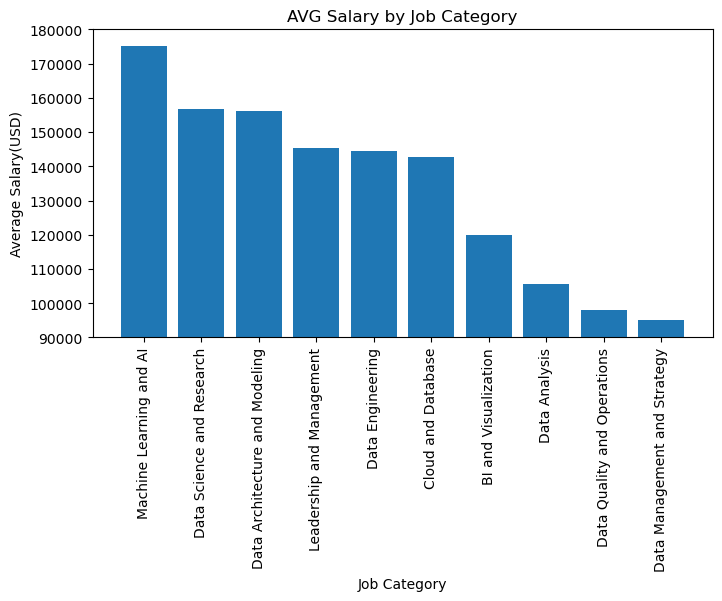

In [15]:
plt.figure(figsize=(8,4))
plt.bar(data=sort_avg_salary_by_job_category,x="job_category", height="salary_in_usd")
plt.ylim(90000,180000)
plt.title("AVG Salary by Job Category")
plt.xlabel(xlabel="Job Category")
plt.ylabel(ylabel="Average Salary(USD)")
plt.xticks(rotation =90)

plt.show()

- Machine Learning and AI  have the Highest salaries.
- Data Management and Strategy  have the Lowest salaries.

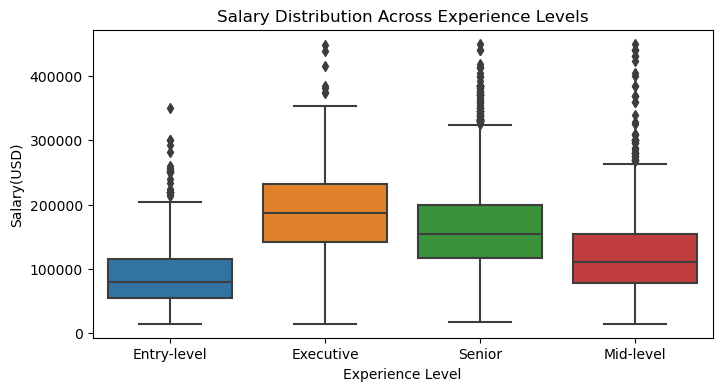

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_clean)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary(USD)')
plt.show()

- Employees at entry level have the lowest salaries
- Most executives earn between approximately 200000 and 300000 with some outliers reaching around 400000.
- Senior employees salaries are concentrated between roughly 150000 and 250000.
- Similar to seniors, mid-level employees earn within a similar range, but with a slightly higher median salary.
    - Salary distribution varies significantly across experience levels, with executives earning the highest and entry-level employees earning the lowest.

In [17]:
avg_salary_by_work_setting = df_clean.groupby("work_setting")["salary_in_usd"].mean().reset_index()
sort_avg_salary_by_work_setting = avg_salary_by_work_setting.sort_values("salary_in_usd",ascending=False)
sort_avg_salary_by_work_setting

,work_setting,salary_in_usd
1,In-person,150263.854713
2,Remote,142642.309562
0,Hybrid,88100.786730


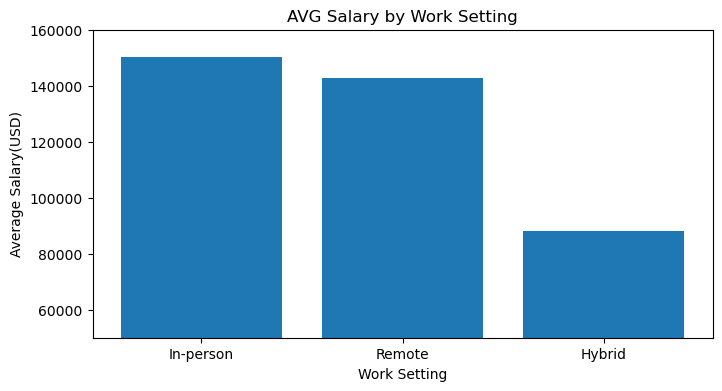

In [18]:
plt.figure(figsize=(8,4))
plt.bar(data=sort_avg_salary_by_work_setting,x="work_setting", height="salary_in_usd")
plt.ylim(50000,160000)
plt.title("AVG Salary by Work Setting")
plt.xlabel(xlabel="Work Setting")
plt.ylabel(ylabel="Average Salary(USD)")
plt.show()

- In-person work setting have the Highest salaries.
- Hybrid work setting have the Lowest salaries.

In [19]:
avg_salary_company_size = df_clean.groupby('company_size')['salary'].mean().sort_values(ascending=False)

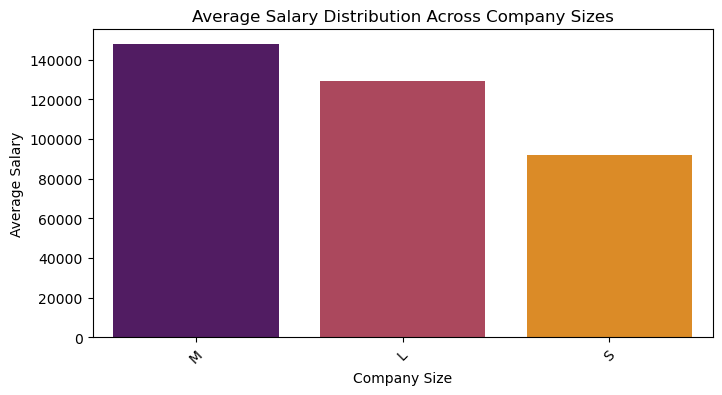

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_salary_company_size.index, y=avg_salary_company_size.values, palette='inferno')
plt.title('Average Salary Distribution Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

Medium Company pay the Highest salaries.

C:\Users\Mina Moneer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mina Moneer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


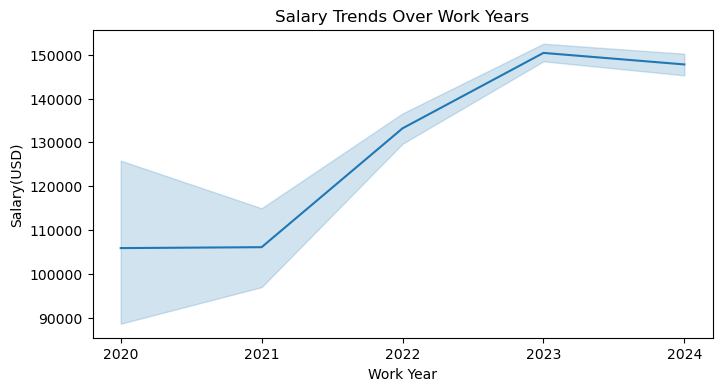

In [21]:
plt.figure(figsize=(8, 4))
df_sorted = df_clean.sort_values('work_year')
sns.lineplot(x='work_year', y='salary_in_usd', data=df_sorted)
plt.xticks(range(2020, 2025))
plt.title('Salary Trends Over Work Years')
plt.xlabel('Work Year')
plt.ylabel('Salary(USD)')
plt.show()

- Salaries have been increasing over the years.
- There was a significant jump in salary between 2020 and 2022.
- After 2022 the rate of increase slowed down

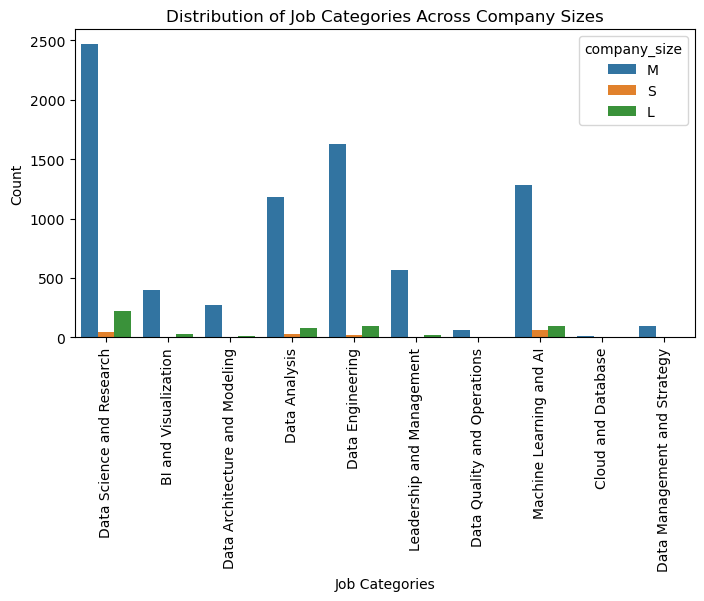

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_clean,x="job_category",hue="company_size")
plt.title('Distribution of Job Categories Across Company Sizes')
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

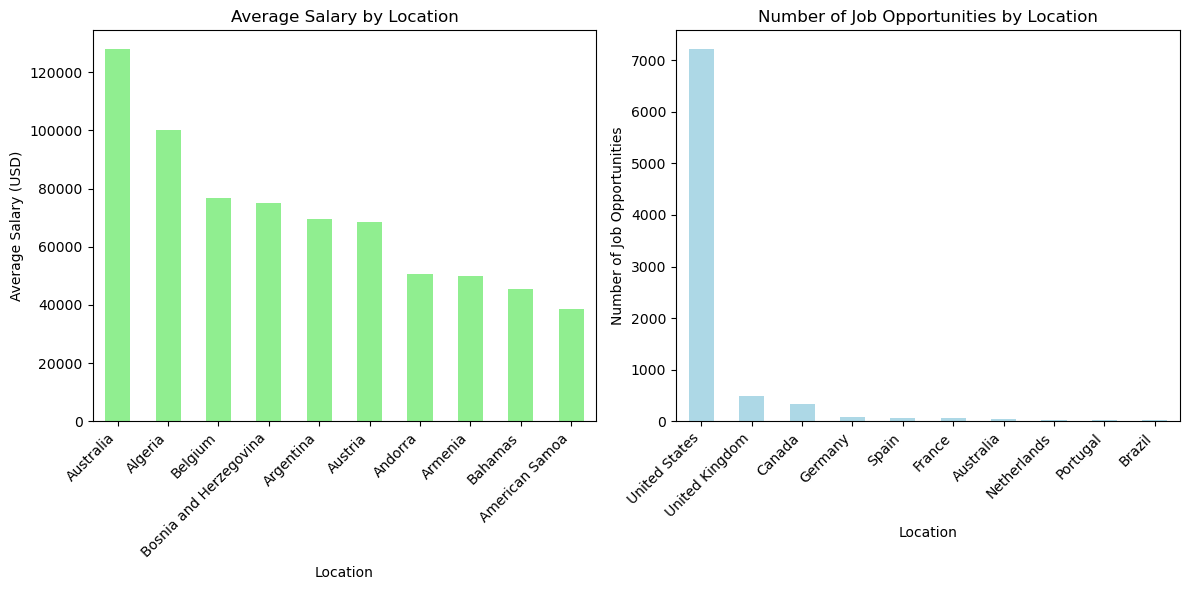

In [39]:
average_salary_by_location = df_clean.groupby('company_location')['salary_in_usd'].mean()
job_opportunities_by_location = df_clean['company_location'].value_counts()

# Plotting average salary and number of job opportunities in different regions or countries
plt.figure(figsize=(12, 6))

# Plotting average salary
plt.subplot(1, 2, 1)
average_salary_by_location.head(10).sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')

# Plotting number of job opportunities
plt.subplot(1, 2, 2)
job_opportunities_by_location.head(10).sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Number of Job Opportunities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Opportunities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- USA have more number of job opportunities but Australia have highest Average Salary